In [1]:
from IPython import display

In [2]:
%matplotlib inline

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

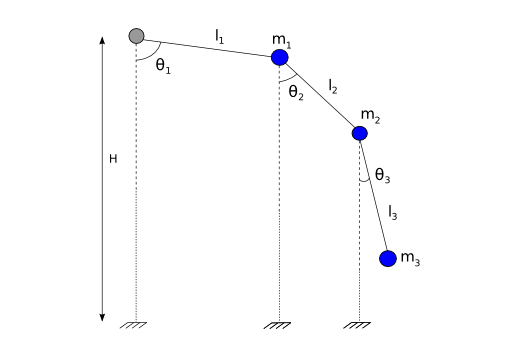

In [3]:
display.Image("https://dournac.org/info/images/triple_pendulum.png")

\begin{align*}
L = &\frac{1}{2} (2 g L_1 m_3 + 2 g L_2 m_3 + 2 g L_3 m_3 + 2 g L_1 m_1 \cos(\theta_1) + 2 g L_1 m_2 \cos(\theta_1)\
- 2 g L_1 m_3 \cos(\theta_1) + 2 g L_2 m_2 \cos(\theta_2) - 2 g L_2 m_3 \cos(\theta_2) \
- 2 g L_3 m_3 \cos(\theta_3) + L_1^2 m_1 \dot{\theta}_1^2 + L_1^2 m_2 \dot{\theta}_1^2 + L_1^2 m_3 \dot{\theta}_1^2\
+ 2 L_1 L_2 m_2 \cos(\theta_1 - \theta_2) \dot{\theta}_1 \dot{\theta}_2 + 2 L_1 L_2 m_3 \cos(\theta_1 - \theta_2) \dot{\theta}_1 \dot{\theta}_2\
+ L_2^2 m_2 \dot{\theta}_2^2 + L_2^2 m_3 \dot{\theta}_2^2 + 2 L_1 L_3 m_3 \cos(\theta_1 - \theta_3) \dot{\theta}_1 \dot{\theta}_3\
+ 2 L_2 L_3 m_3 \cos(\theta_2 - \theta_3) \dot{\theta}_2 \dot{\theta}_3 + L_3^2 m_3 \dot{\theta}_3^2)
\end{align*}

In [4]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

In [31]:
class TriplePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the simple pendulum1
    L2:  float(tbd)
        length of the simple pendulum1
        
    g : float
        gravitational acceleration at the earth's surface
    omega1_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    omega2_0:float(tbd)
        let it be zero
    mass1 : float
        mass of pendulum1
    mass2 : float(tbd)
        mass of pendulum2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2=1.,L3 =1., mass1=1.,mass2=1.,mass3 =1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
        self.m3 = mass3
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            #A 2-component vector with y[0] = theta1(t) and y[1] = dtheta1/dt=z1
             y[2] = theta2(t) and y[3] = dtheta2/dt=z2
            
        Returns
        -------
        
        """
        L1 = self.L1
        L2 = self.L2
        L3 = self.L3
        g = self.g
        m1 = self.m1
        m2 = self.m2
        m3 = self.m3
        
        
        theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = y
        z1 = theta1_dot
        z2 = theta2_dot
        z3 = theta3_dot
        
        #I speparate my acceleration into multiple componants
        z1_dot1 = (-4. * g * m1 * m2 - 2. * g * m2 ** 2. - 2. * g * m1 * m3 - 2.*g*m2*m3)*np.sin(theta1)
        z1_dot2 = (-2. * g * m2**2. - 2.*g*m2*m3) * np.sin(theta1 - 2. * theta2)
        z1_dot3 = g * m1 * m3 * np.sin(theta1 + 2.* theta2 - 2. * theta3)
        z1_dot4 = g * m1 * m3 * np.sin(theta1 - 2.* theta2 + 2.* theta3)
        z1_dot5 = (-2.*L1* m2**2. * z1 ** 2. - 2.*L1*m2*m3* z1 **2.)*np.sin(2.*theta1-2.*theta2)
        z1_dot6 = (-4.*L2*m2**2. * z2 **2. - 4.*L2 * m2 * m3 * z2**2.)* np.sin(theta1-theta2)
        z1_dot7 = (2. * L3 * m2 * m3 * z3 **3. * np.sin( theta1 - theta3 ))
        z1_dot8 = 2.*L3*m2*m3* z3**2. * np.sin(theta1-2.*theta2+theta3)
        c1 = 2.* L1
        z1_dot9 = (2.*m1*m2 + m2**2. + m2*m3)*c1
        z1_dot10 = (-m2**2. - m2*m3)* np.cos(2.*theta1 - 2.*theta2)*c1
        z1_dot11 = m1*m3*np.cos(2.*theta2 - 2.*theta3)*c1
        
        z1_dot = (z1_dot1 + z1_dot1+z1_dot3+z1_dot4+z1_dot5 + z1_dot6 - z1_dot7 - z1_dot8)/(z1_dot9+z1_dot10 -z1_dot11)
        
        
        z2_dot1 = (-2.*g*m1*m2 - 2.*g*m2**2. - g*m1*m3-2.*g*m2*m3)*np.sin(2.*theta1-theta2)
        z2_dot2 = (2.*g*m1*m2 + 2.*g*m2**2. + g*m1*m3 + 2.*g*m2*m3)*np.sin(theta2)
        z2_dot3 = g*m1*m3*np.sin(theta2-2.*theta3)
        z2_dot4 = g*m1*m3*np.sin(2.*theta1+theta2-2.*theta3)
        z2_dot5 = 2. * L1 * m1 * m3 * z1**2. * np.sin(theta1+theta2-2.*theta3)
        z2_dot6 = (-4.*L1*m1*m2*z1**2. - 4. * L1 * m2 **2. * z1**2. - 2.*L1*m1*m3*z1**2. - 4.*L1*m2*m3*z1**2.)*np.sin(theta1-theta2)
        z2_dot7 = 2.*L2*m1*m3*z2**2.*np.sin(2.*theta2-2.*theta3) + (-2.*L2*m2**2. * z2**2. - 2.* L2 *m2*m3*z2**2.)*np.sin(2.*(theta1-theta2))
        z2_dot8 = 2.*L3*m2*m3*np.sin(2.*theta1-theta2-theta3)*z3**2.
        z2_dot9 = (4.*L3*m1*m3*z3**2. + 2.*L3*m2*m3*z3**2.)*np.sin(theta2-theta3)
        c2 = 2.*L2
        z2_dot10 = c2* (2.*m1*m2 + m2**2. + m1*m3 +m2*m3)
        z2_dot11 = c2 *(-m2**2. - m2*m3)*np.cos(2.*theta1-2.*theta2)
        z2_dot12 = c2 * np.cos(2.*theta2 - 2.*theta3)*m1*m3
        z2_dot = -1.*(z2_dot1 + z2_dot3 + z2_dot4 + z2_dot5 + z2_dot6 + z2_dot7 - z2_dot8 +z2_dot9)/(z2_dot10+z2_dot11-z2_dot12)
        
        
        
        c3 = -2.*m1*np.cos((theta2-theta3)/2.)*np.sin((theta2-theta3)/2.)
        
        z3_dot1 = (g*m2+g*m3)*np.cos(2.*theta1-theta2)
        z3_dot2 = (g*m2 + g*m3)*np.cos(theta2)
        z3_dot3 = (2.*L1*m2*z1**2. + 2.*L1*m3*z1**2.)*np.cos(theta1-theta2)
        z3_dot4 = 2.*L2*z2**2. * (m2+m3)
        z3_dot5 = 2.*L3*m3*z3**2. * np.cos(theta2-theta3)
        c4 = L3
        z3_dot6 =  (-2.*m1*m2 - m2**2. -m1*m3 -m2*m3)
        z3_dot7 = (m2**2. + m2*m3)*np.cos(2.*(theta1-theta2))
        z3_dot8 = m1*m3*np.cos(2.*(theta2-theta3))
        z3_dot = (c3)*(z3_dot1+z3_dot2+z3_dot3+z3_dot4+z3_dot5)/(c4*(z3_dot6+z3_dot7 + z3_dot8))
        

        
        return theta1_dot, z1_dot, theta2_dot, z2_dot, theta3_dot ,z3_dot
        
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0,theta2_dot_0,
                  theta3_0, theta3_dot_0):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0]
        solution = solve_ivp(self.dy_dt,(t_pts[0], t_pts[-1]),
                             y,t_eval=t_pts)
        #DEBUG
        print(solution)
        theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = solution.y
        
        return theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot


In [6]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [7]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [36]:

theta_vs_time_labels = (r'$t$', r'$\theta(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.1
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
L3 = 1.
g = 1.
mass1 = 1.
mass2 = 1.
mass3 = 1.

# Instantiate a pendulum 
tp1 = TriplePendulum(L1=L1,L2=L2,L3 = L3, mass1 = mass1,  mass2=mass2, mass3 = mass3, g=g)

In [37]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.
theta3_0 = np.pi/2.
theta3_dot_0 = 0.


theta1, theta_dot, theta2, theta2_dot, theta3, theta3_dot = \
    tp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0,theta3_0, theta3_dot_0)


  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 1.000e-01  1.100e-01 ...  5.790e+00  5.800e+00]
        y: [[ 1.571e+00  1.571e+00 ...  1.344e+00  1.449e+00]
            [ 0.000e+00 -1.571e-02 ...  3.388e+01 -1.509e+01]
            ...
            [ 1.571e+00  1.571e+00 ... -2.034e+00 -1.712e+00]
            [ 0.000e+00 -2.530e-11 ...  1.053e+01  5.849e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4808
     njev: 0
      nlu: 0


the number of data like the number element in theta3 depend on initial condition how come?

In [30]:
#debug
len(theta3)

6

In [11]:
theta3

array([1.57079633])

In [12]:
theta2

array([3.14159265])

In [9]:
len(t_pts)

6

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

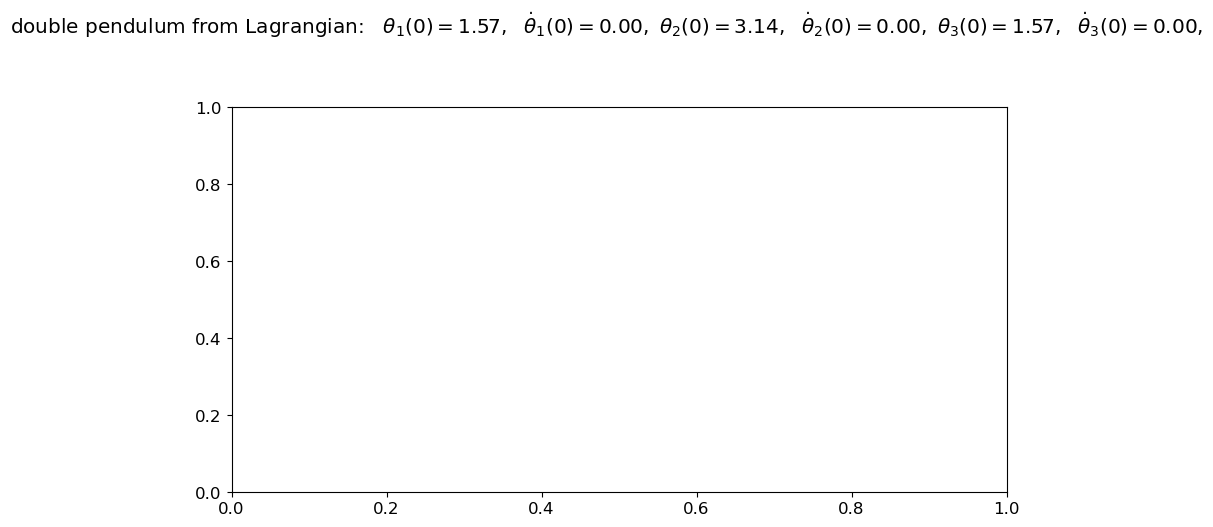

In [14]:
fig = plt.figure(figsize=(10,5))
overall_title = 'double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                rf' $\theta_3(0) = {theta3_0:.2f},$' + \
                rf'  $\dot\theta_3(0) = {theta3_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            title=r'$\theta_1(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            title=r'$\theta_2(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], theta3[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_3(t)$', 
            title=r'$\theta_3(t)$', 
            ax=ax_a)
fig.tight_layout()
fig.savefig('triple_pendulum_Lagrange.png', bbox_inches='tight')